### Notebook to learn how to implement the EI in our problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Model_BO import model
import pickle

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
from sklearn import gaussian_process as gp
from sklearn.preprocessing import StandardScaler

The model that we pass to the EI algorithm computes the number of leisure trips in negative since the EI aims at maximizing intead of minimizing to find the vulnerable cases

In [2]:
#After optimization
###### Load data
with open('Data/X800.pickle', 'rb') as handle:
    X_test = pickle.load(handle) #Points to compute the posterior
with open('Data/output800.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [3]:
### If you don't want to run the optimization
###### Load data
import pickle
with open('Data/X_EI.pickle', 'rb') as handle:
    x_obs = pickle.load(handle)
with open('Data/Y_EI.pickle', 'rb') as handle:
    y_obs = pickle.load(handle)

In [4]:
#n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
#init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

bo = BayesianOptimization(
    f=model,
    pbounds={"x1": (0.1, 2), "x2": (0.1, 2), "x3": (0.1, 2)},
    verbose=2,
    random_state=987234,
)
bo._gp.kernel = gp.kernels.RBF()
acquisition_function = UtilityFunction(kind="ei", xi=1e-1) #the points are more spread out within the range
bo.maximize(n_iter=200, acquisition_function=acquisition_function, init_points=200)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | -7.673e+0 | 0.3013    | 1.518     | 0.5293    |
| 2         | -7.555e+0 | 0.168     | 0.435     | 0.2822    |
| 3         | -7.768e+0 | 1.45      | 0.5819    | 1.002     |
| 4         | -8.03e+03 | 1.415     | 1.196     | 1.78      |
| 5         | -7.805e+0 | 0.9082    | 1.056     | 0.952     |
| 6         | -7.83e+03 | 1.951     | 1.245     | 0.8555    |
| 7         | -7.914e+0 | 1.287     | 1.682     | 1.246     |
| 8         | -7.794e+0 | 1.454     | 0.1012    | 0.9902    |
| 9         | -7.863e+0 | 1.149     | 1.146     | 1.437     |
| 10        | -7.927e+0 | 1.485     | 1.509     | 1.227     |
| 11        | -7.857e+0 | 1.645     | 0.1801    | 1.515     |
| 12        | -7.59e+03 | 1.525     | 0.2146    | 0.2582    |
| 13        | -7.689e+0 | 1.617     | 1.586     | 0.5173    |
| 14        | -7.847e+0 | 1.802     | 1.501     | 0.5246    |
| 15        | -7.656e+0 | 1.049     | 1.848     | 0.1712    |
| 16        | -7.706e+0 | 0.1241    | 0.4473    | 1.44      |
| 17    

In [5]:
#save the observed points
with open('Data/X_EI.pickle', 'wb') as handle:
    pickle.dump(x_obs, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('Data/Y_EI.pickle', 'wb') as handle:
    pickle.dump(y_obs, handle, protocol=pickle.HIGHEST_PROTOCOL)

 ### Print sampled points by the EI algorithm

In [6]:
x_obs = np.array([[res["params"]["x1"], res["params"]["x2"], res["params"]["x3"]] for res in bo.res])
y_obs = np.array([res["target"] for res in bo.res])
y_obs[:100]

array([-7673., -7555., -7768., -8030., -7805., -7830., -7914., -7794.,
       -7863., -7927., -7857., -7590., -7689., -7847., -7656., -7706.,
       -7800., -7779., -7877., -7984., -7837., -7595., -7754., -7916.,
       -7848., -7969., -7793., -7883., -8000., -7816., -7699., -7732.,
       -7708., -7652., -7735., -7879., -7559., -7772., -7619., -7940.,
       -7752., -7695., -7734., -7710., -7658., -7827., -7801., -7887.,
       -7834., -7652., -7625., -7904., -7997., -7757., -7953., -7788.,
       -7850., -7928., -7771., -7658., -7906., -7545., -7668., -7644.,
       -7898., -7859., -7752., -7943., -7829., -7780., -7602., -7748.,
       -7705., -7654., -7845., -7861., -7520., -7957., -7818., -7958.,
       -7714., -7791., -7726., -7923., -7800., -7817., -7835., -7711.,
       -7659., -7833., -7809., -7454., -7953., -7907., -7803., -7508.,
       -7699., -7638., -7766., -7754.])

In [7]:
print(bo.max)

{'target': -7431.0, 'params': {'x1': 0.8305826555348373, 'x2': 0.30764431265196374, 'x3': 0.1949360384432875}}


In [8]:
y_obs = -y_obs

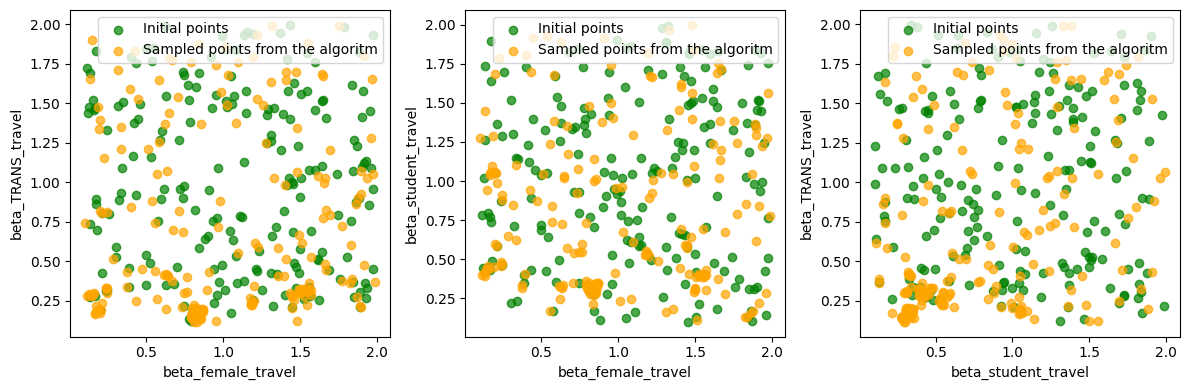

In [9]:
Initial = 200
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(x_obs[:Initial,0], x_obs[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[0].scatter(x_obs[Initial:,0], x_obs[Initial:,2], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(x_obs[:Initial,0], x_obs[:Initial,1], c='green', label = 'Initial points', alpha =0.7)
axes[1].scatter(x_obs[Initial:,0], x_obs[Initial:,1], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(x_obs[:Initial,1], x_obs[:Initial,2], c='green', label = 'Initial points', alpha =0.7)
axes[2].scatter(x_obs[Initial:,1], x_obs[Initial:,2], c='orange', label = 'Sampled points from the algoritm', alpha =0.7)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

In [11]:
percentil_20 = np.percentile(y_obs, 20)
print( "Percentil 20:", percentil_20)
percentil_80 = np.percentile(y_obs, 80)
print( "Percentil 80:", percentil_80)

Percentil 20: 7612.8
Percentil 80: 7877.4


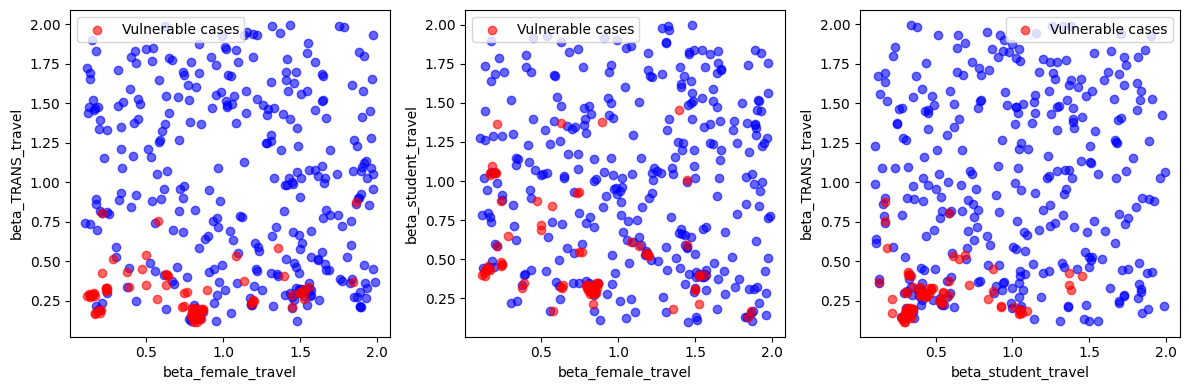

In [12]:
Y_mask= y_obs < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(x_obs[~Y_mask,0], x_obs[~Y_mask,2], c='blue', alpha=0.6)
axes[0].scatter(x_obs[Y_mask,0], x_obs[Y_mask,2], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(x_obs[~Y_mask,0], x_obs[~Y_mask,1], c='blue' , alpha=0.6)
axes[1].scatter(x_obs[Y_mask,0], x_obs[Y_mask,1], c='red', label= 'Vulnerable cases', alpha=0.6)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(x_obs[~Y_mask,1], x_obs[~Y_mask,2], c='blue' , alpha=0.6)
axes[2].scatter(x_obs[Y_mask,1], x_obs[Y_mask,2], c='red', label= 'Vulnerable cases' , alpha=0.6)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

### Compute the posterior

In [21]:
### If you don't want to run the optimization
###### Load data
import pickle
with open('Data/X_EI.pickle', 'rb') as handle:
    x_obs = pickle.load(handle)
with open('Data/Y_EI.pickle', 'rb') as handle:
    y_obs = pickle.load(handle)

In [22]:
y_obs = -y_obs

In [23]:
import gpytorch
import torch

y_obs= y_obs.astype(float)
y_obs = torch.from_numpy(y_obs)
x_obs = torch.from_numpy(x_obs)

# Define a Gaussian process regression model with GPYtorch
class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()

In [24]:
model1 = GPRegressionModel(x_obs, y_obs, likelihood)

# Train the model1 on the labeled dataset
model1.train()
likelihood.train()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model1)

for i in range(6000):
    optimizer.zero_grad()
    output = model1(x_obs)
    loss = -mll(output, y_obs)
    print('Iter: ' , i , 'Loss:  %.3f'  %loss.item())
    loss.backward()
    optimizer.step()

Iter:  0 Loss:  633076.230
Iter:  1 Loss:  532264.274
Iter:  2 Loss:  452716.035
Iter:  3 Loss:  389684.792
Iter:  4 Loss:  339359.089
Iter:  5 Loss:  298768.844
Iter:  6 Loss:  265650.581
Iter:  7 Loss:  238303.069
Iter:  8 Loss:  215455.763
Iter:  9 Loss:  196159.018
Iter:  10 Loss:  179698.894
Iter:  11 Loss:  165533.734
Iter:  12 Loss:  153247.849
Iter:  13 Loss:  142518.314
Iter:  14 Loss:  133091.057
Iter:  15 Loss:  124763.678
Iter:  16 Loss:  117373.009
Iter:  17 Loss:  110786.007
Iter:  18 Loss:  104893.079
Iter:  19 Loss:  99602.995
Iter:  20 Loss:  94839.178
Iter:  21 Loss:  90536.862
Iter:  22 Loss:  86640.812
Iter:  23 Loss:  83103.672
Iter:  24 Loss:  79884.587
Iter:  25 Loss:  76948.152
Iter:  26 Loss:  74263.526
Iter:  27 Loss:  71803.760
Iter:  28 Loss:  69545.236
Iter:  29 Loss:  67467.159
Iter:  30 Loss:  65551.198
Iter:  31 Loss:  63781.149
Iter:  32 Loss:  62142.643
Iter:  33 Loss:  60622.941
Iter:  34 Loss:  59210.682
Iter:  35 Loss:  57895.768
Iter:  36 Loss:  56

In [25]:
X_LHS = torch.from_numpy(X_test)
# Use the model1 to make predictions on the unlabeled dataset
model1.eval()
likelihood.eval()
with torch.no_grad():
    pred_dist = likelihood(model1(X_LHS))

In [26]:
output = pred_dist.mean

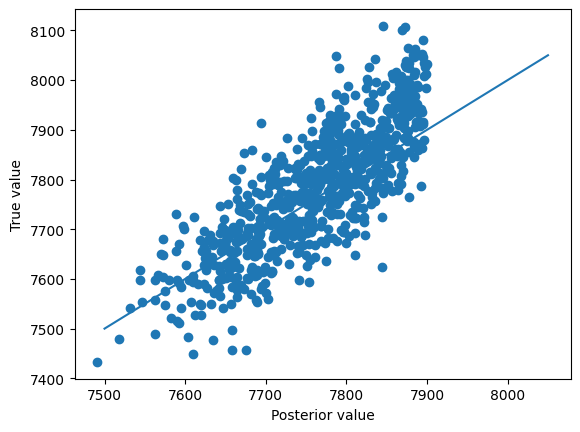

In [27]:
plt.scatter(output, y_test)
plt.xlabel("Posterior value")
plt.ylabel("True value")
plt.plot([7500, 8050],[7500, 8050])

In [28]:
for param_name, param in model1.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

Parameter name: likelihood.noise_covar.raw_noise           value = 22.338497161865234
Parameter name: mean_module.raw_constant                   value = 234.34832763671875
Parameter name: covar_module.raw_outputscale               value = 32.32572555541992
Parameter name: covar_module.base_kernel.raw_lengthscale   value = 7.301974773406982


In [29]:
final_mse = gpytorch.metrics.mean_squared_error(pred_dist, y_test, squared=True)
final_mse

tensor(6362.2819, dtype=torch.float64)

In [30]:
print("Error of the posterior: ", ((np.sqrt(sum((output-y_test)**2)/400))))

Error of the posterior:  tensor(112.8032, dtype=torch.float64)


In [31]:
percentil_20 = np.percentile(output, 20)
print( "Percentil 20:", percentil_20)

Percentil 20: 7688.249238513884


In [32]:
Y= [1 if output[i] < percentil_20 else 0 for i in range(len(output))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than ", percentil_20, "in the whole population")

Number of vulnerable scenarios:  160.0  where the leasure trips are less than  7688.249238513884 in the whole population


We plot the posterior in the 800 LHS points and apply PRIM

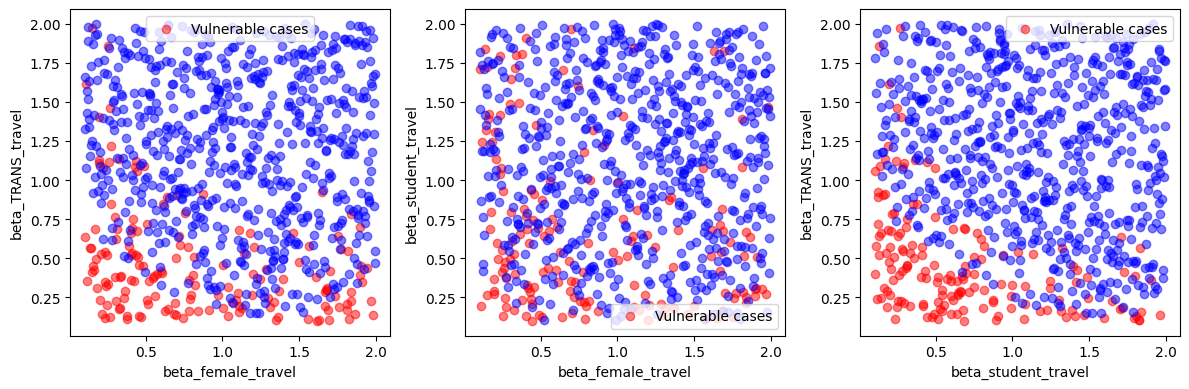

In [33]:
Y_mask= output < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X_test[Y_mask,0], X_test[Y_mask,2], c='red', label= 'Vulnerable cases', alpha= 0.5)
axes[0].scatter(X_test[~Y_mask,0], X_test[~Y_mask,2], c='blue',  alpha= 0.5)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X_test[Y_mask,0], X_test[Y_mask,1], c='red', label= 'Vulnerable cases',  alpha= 0.5)
axes[1].scatter(X_test[~Y_mask,0], X_test[~Y_mask,1], c='blue',  alpha= 0.5)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X_test[Y_mask,1], X_test[Y_mask,2], c='red', label= 'Vulnerable cases',  alpha= 0.5)
axes[2].scatter(X_test[~Y_mask,1], X_test[~Y_mask,2], c='blue',  alpha= 0.5)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

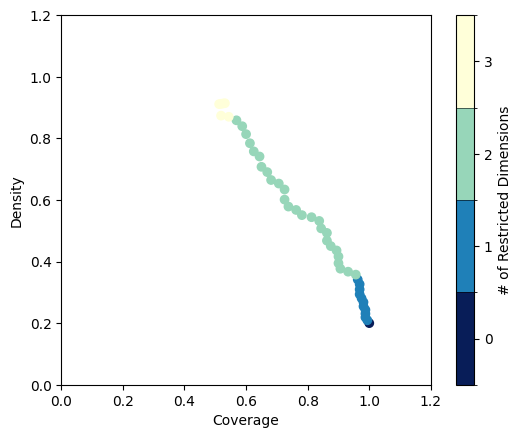

In [34]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X_test, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

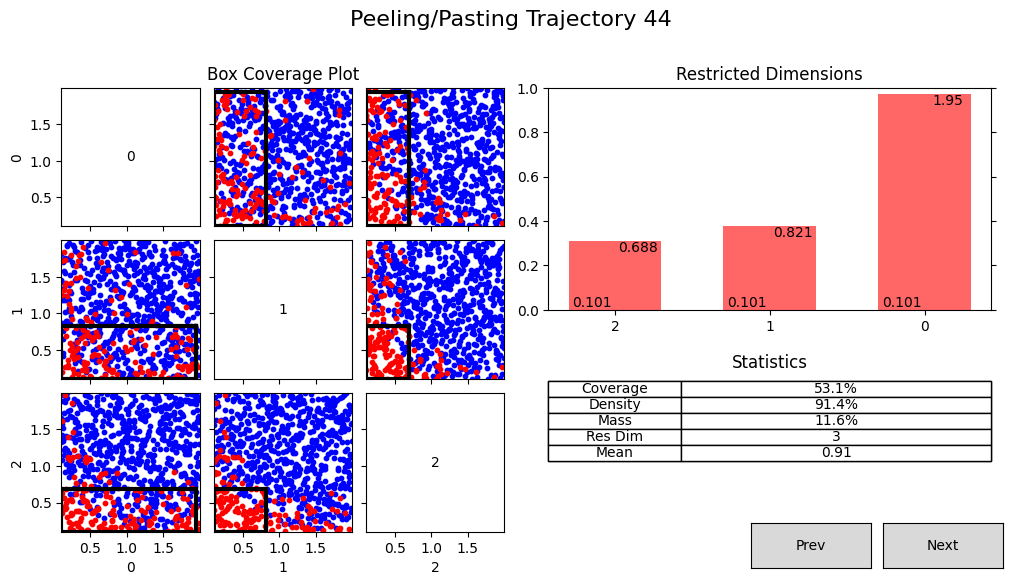

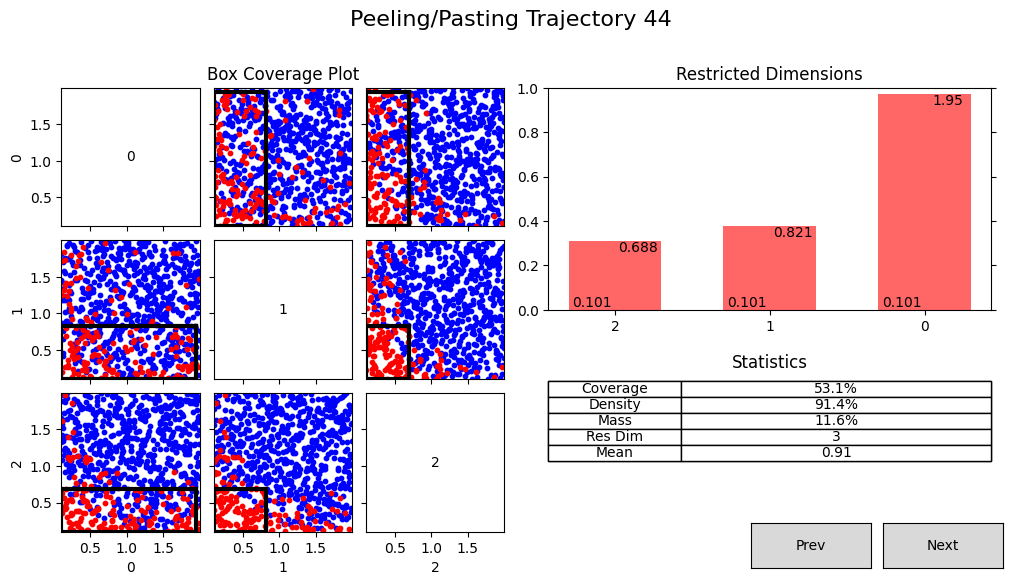

In [35]:
box.show_details()